In [47]:
%tensorflow_version 2.x
 
from google.colab import files
import numpy as np
import pandas as pd
from numpy import loadtxt
import io
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
 
print(tf.version)  

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [48]:
uploaded = files.upload()


Saving BMS_Training.csv to BMS_Training.csv


In [60]:
CSV_COLUMN_NAMES = ['Current', 'Temperature', 'Voltage', 'SoC']
df = pd.read_csv(io.BytesIO(uploaded['BMS_Training.csv']), names = CSV_COLUMN_NAMES,header =0)
print(df)
print('----------')
train_data = df.iloc[1:874619,:]   # training inputs
print(train_data)
print('----------')

         Current  Temperature  Voltage       SoC
0       0.127796           10  4.19528  0.999985
1       0.947562           10  4.19517  0.999873
2       0.332957           10  4.19513  0.999834
3       0.218627           10  4.19510  0.999808
4       0.082667           10  4.19509  0.999798
...          ...          ...      ...       ...
874612  0.607814           40  3.35483  0.200313
874613  0.173269           40  3.35481  0.200294
874614  0.846583           40  3.35471  0.200202
874615  1.041520           40  3.35459  0.200088
874616  0.964995           40  3.35448  0.199983

[874617 rows x 4 columns]
----------
         Current  Temperature  Voltage       SoC
1       0.947562           10  4.19517  0.999873
2       0.332957           10  4.19513  0.999834
3       0.218627           10  4.19510  0.999808
4       0.082667           10  4.19509  0.999798
5       0.361950           10  4.19504  0.999756
...          ...          ...      ...       ...
874612  0.607814           40  

In [61]:
uploaded1 = files.upload()

Saving BMS_Test.csv to BMS_Test (2).csv


In [62]:
CSV_COLUMN_NAMES = ['Current', 'Temperature', 'Voltage', 'SoC']
df1 = pd.read_csv(io.BytesIO(uploaded1['BMS_Test.csv']), names = CSV_COLUMN_NAMES,header = 0)
print(df1)
print('----------')
test_data = df1.iloc[1:79717,:]   # training inputs
print(test_data)
print('----------')


        Current  Temperature  Voltage       SoC
0      1.227570           10  4.19515  0.999854
1      0.214431           10  4.19512  0.999829
2      0.987350           10  4.19500  0.999712
3      0.679914           10  4.19491  0.999632
4      0.558107           10  4.19484  0.999566
...         ...          ...      ...       ...
79710  0.621204           40  3.35473  0.200218
79711  0.291528           40  3.35470  0.200186
79712  0.497223           40  3.35464  0.200132
79713  0.630474           40  3.35457  0.200064
79714  0.904073           40  3.35446  0.199965

[79715 rows x 4 columns]
----------
        Current  Temperature  Voltage       SoC
1      0.214431           10  4.19512  0.999829
2      0.987350           10  4.19500  0.999712
3      0.679914           10  4.19491  0.999632
4      0.558107           10  4.19484  0.999566
5      0.961791           10  4.19472  0.999452
...         ...          ...      ...       ...
79710  0.621204           40  3.35473  0.200218
797

In [ ]:
y_train = train_data.pop('SoC')  # training output
y_test = test_data.pop('SoC')     # testing output

In [65]:

print(train_data.shape)
print(y_train.shape)
print(test_data.shape)
print(y_test.shape)

(874616, 3)
(874616,)
(79714, 3)
(79714,)


In [66]:
model = Sequential()
model.add(Dense(200,input_dim=3,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(loss='MSE',optimizer='adam', metrics=['MAPE'],)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               800       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 41,201
Trainable params: 41,201
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(train_data,y_train,epochs=10,batch_size=32, validation_split = 0.15, validation_freq = 3)

Epoch 1/10
23232/23232 [==============================] - 55s 2ms/step - loss: 0.0084 - MAPE: 10.3038
Epoch 2/10
23232/23232 [==============================] - 39s 2ms/step - loss: 1.6878e-04 - MAPE: 1.7248
Epoch 3/10
23232/23232 [==============================] - 43s 2ms/step - loss: 8.3818e-05 - MAPE: 1.1427 - val_loss: 4.7399e-05 - val_MAPE: 0.6329
Epoch 4/10
23232/23232 [==============================] - 39s 2ms/step - loss: 5.0710e-05 - MAPE: 0.8704
Epoch 5/10
23232/23232 [==============================] - 39s 2ms/step - loss: 4.3551e-05 - MAPE: 0.7692
Epoch 6/10
23232/23232 [==============================] - 42s 2ms/step - loss: 3.3573e-05 - MAPE: 0.6957 - val_loss: 1.5735e-05 - val_MAPE: 0.5192
Epoch 7/10
23232/23232 [==============================] - 39s 2ms/step - loss: 3.1820e-05 - MAPE: 0.6874
Epoch 8/10
23232/23232 [==============================] - 39s 2ms/step - loss: 2.7996e-05 - MAPE: 0.6528
Epoch 9/10
23232/23232 [==============================] - 44s 2ms/step - loss: 

In [69]:
keras.backend.clear_session()

In [70]:
print(test_data)

        Current  Temperature  Voltage
1      0.214431           10  4.19512
2      0.987350           10  4.19500
3      0.679914           10  4.19491
4      0.558107           10  4.19484
5      0.961791           10  4.19472
...         ...          ...      ...
79710  0.621204           40  3.35473
79711  0.291528           40  3.35470
79712  0.497223           40  3.35464
79713  0.630474           40  3.35457
79714  0.904073           40  3.35446

[79714 rows x 3 columns]


In [71]:
model.save('soc_predictor_new.h5')

In [75]:
out_data = model.predict(test_data)


In [76]:
np.savetxt("out_data.csv", out_data, delimiter=",")

In [78]:
np.savetxt("out_data_original.csv", y_test, delimiter=",")

In [79]:
test_voltage = test_data.pop('Voltage')
print(test_voltage)

1        4.19512
2        4.19500
3        4.19491
4        4.19484
5        4.19472
          ...   
79710    3.35473
79711    3.35470
79712    3.35464
79713    3.35457
79714    3.35446
Name: Voltage, Length: 79714, dtype: float64


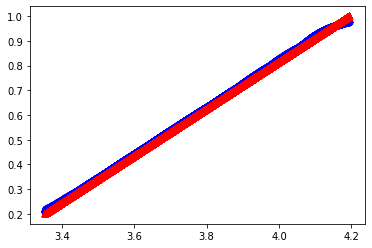

In [81]:
tv = test_voltage.iloc[0:79714]
od = out_data[0:79714]
xpoints = tv
ypoints = od

plt.scatter(xpoints,ypoints, marker='o', facecolors='none', edgecolors='b') #plot of predicted data
plt.scatter(xpoints, y_test[0:79714], marker='^', facecolors='none', edgecolors='r') #plot of original data
plt.show()